# WeRateDogs Data Wrangling



## Introduction

Using python and its libraries i should wrangle and analyze the data of twitter accounts which is used for rating dogs in twitter

## Gathering Data 

1- **Twitter archive file:** This file is donwload manually from the classroom as twitter-archive-enhanced-2.csv

2- **Twitter image predections file:** This tfile contains the breed of dogs (or other animals, subjects) and this file is donwloaded manually from the classroom as image-predictions-3.tsv

3- **Twitter JSON file :** This file should be donwload programmatically from the twitter API but due the lake of time i downloaded the twitter-json.text from the class room

In [175]:
# Imporing all packages used
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import time
import re
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Twitter archive file

In [176]:
# Reading the csv file
archive_df = pd.read_csv('twitter-archive-enhanced-2.csv')

In [177]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [178]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Image prediction file

In [179]:
# Reading the tsv file 
image_df = pd.read_csv('image-predictions-3.tsv', sep = '\t')

In [180]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [181]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Twitter JSON file  

In [182]:
# Reading the txt file 

df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'user_count': user_count})
        
json_df = pd.DataFrame(df_list)


In [183]:
json_df.head()

,tweet_id,retweet_count,favorite_count,user_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


In [184]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
 3   user_count      2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


## Assessing Data 

### visual Assessment
for this step i used spyder IDE to fully view the files as it has a great variable explorer and the images of the visual assessment is given with file 

In [185]:
json_df

,tweet_id,retweet_count,favorite_count,user_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
...,...,...,...,...
2349,666049248165822465,41,111,3201018
2350,666044226329800704,147,311,3201018
2351,666033412701032449,47,128,3201018
2352,666029285002620928,48,132,3201018


### Programmatic assessment 

In [186]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [187]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [188]:
archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [189]:
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [190]:
archive_df[archive_df['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [191]:
archive_df[archive_df['name'].apply(len) <= 2 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [192]:
archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [193]:
archive_df[archive_df['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Quality Issues
- reply_to_status_id, reply_to_user_id, retweeted_status_id, retweeted_status_user_id, should be integers or strings instead of float.
- retweeted_status_timestamp, timestamp should be datetime instead of strings.
- Changeing the typ of those columns types to strings (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and tweet_id) to strings as we don't need to do any operatins on them
- The numerator and denominator columns have non true values.
- There is invalid names (less than 3 chars).
- We need to remove the retweeted tweets.

In [194]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [195]:
image_df['jpg_url'].value_counts()

https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg                                            2
https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg                                            2
https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg                                            2
https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CUZABzGW4AE5F0k.jpg                                            1
https://pbs.twimg.com/media/DAtm5MkXoAA4R6P.jpg                                            1
https://pbs.twimg.com/ext_tw_video_thumb/751456786360725504/pu/img/hWqfIQ29A0cBv6f_.jpg    1
https://pbs.twimg.com/media/CVBOFTLWwAAzlNi.jpg                                            1
https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg                       

### Quality Issues
- Missing some images from dataset 2075 rows instead of 2356.
- Some tweets have 2 different tweet_id.
- Some tweet_ids have same jpg_url.

### All quality issues

- We need to remove the retweeted tweets
- Changeing the typ of those columns types to strings (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and tweet_id) to strings as we don't need to do any operatins on them
- The numerator and denominator columns have non true values.
- There is invalid names (less than 3 chars).
- reply_to_status_id, reply_to_user_id, retweeted_status_id, retweeted_status_user_id, should be integers or strings instead of float.
- Some tweet_ids have same jpg_url.
- Some tweets have 2 different tweet_id.
- retweeted_status_timestamp, timestamp should be datetime instead of strings.
- Missing some images from dataset 2075 rows instead of 2356.


### Tidiness Issues

- There is 4 stage columns (doggo, floofer, pupper, puppo) We should delete them.
- We need to merge all the dataframes(image_df, json_df) into archive_df

# Cleaning
that is the state in wich we fix the issues what was mentioned above

In [196]:
json_clean = json_df.copy()
archive_clean = archive_df.copy()
image_clean = image_df.copy()

### Define
Mering json_df, image_df into archive_df
- https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

### Code

In [197]:
archive_clean = pd.merge(left=archive_clean,
                                 right=json_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [198]:
archive_clean = archive_clean.merge(image_clean, on='tweet_id', how='inner')

### Test

In [199]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

### Define
Deleting rows and columns that we dont use them and performing some changes in columns
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [200]:
# with no pictures
archive_clean = archive_clean.dropna(subset = ['jpg_url'])
# rewteets
archive_clean = archive_clean[pd.isnull(archive_clean.retweeted_status_id)]
# columns that we dont need 
archive_clean = archive_clean.drop('retweeted_status_id', 1)
archive_clean = archive_clean.drop('retweeted_status_user_id', 1)
archive_clean = archive_clean.drop('retweeted_status_timestamp', 1)
# duplicated in tweet_id
arvhive_clean = archive_clean.drop_duplicates()

### Test

In [201]:
list(archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'retweet_count',
 'favorite_count',
 'user_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

### Define
Moving doggo, floofer, pupper and puppo columns into one column
- https://www.geeksforgeeks.org/python-extracting-rows-using-pandas-iloc/

### Code

In [202]:
archive_clean.loc[archive_clean.doggo == 'None', 'doggo'] = ''
archive_clean.loc[archive_clean.floofer == 'None', 'floofer'] = ''
archive_clean.loc[archive_clean.pupper == 'None', 'pupper'] = ''
archive_clean.loc[archive_clean.puppo == 'None', 'puppo'] = ''

archive_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1688
1,,,,puppo,22
2,,,pupper,,203
3,,floofer,,,7
4,doggo,,,,63
5,doggo,,,puppo,1
6,doggo,,pupper,,9
7,doggo,floofer,,,1


In [203]:
archive_clean['dog_stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo
archive_clean.loc[archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
archive_clean.loc[archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
archive_clean.loc[archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

archive_clean.loc[archive_clean.dog_stage == '', 'dog_stage'] = 'None'

In [204]:
archive_clean['dog_stage']

0       None
1       None
2       None
3       None
4       None
        ... 
2068    None
2069    None
2070    None
2071    None
2072    None
Name: dog_stage, Length: 1994, dtype: object

### Test

In [205]:
archive_clean.dog_stage.value_counts()

None             1688
pupper            203
doggo              63
puppo              22
doggo,pupper        9
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

### Define
removing image predection coumns
- https://stackoverflow.com/questions/7087287/adding-to-a-list-defined-in-a-function

In [206]:
# Appending first true values to list'predictions' otherwise appending NaN
predictions = []
confidence_level = []

def prediction_func(dataframe):
    if dataframe['p1_dog'] == True:
        predictions.append(dataframe['p1'])
        confidence_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        predictions.append(dataframe['p2'])
        confidence_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        predictions.append(dataframe['p3'])
        confidence_level.append(dataframe['p3_conf'])
    else:
        predictions.append('NaN')
        confidence_level.append(0)

archive_clean.apply(prediction_func, axis=1)
archive_clean['prediction'] = predictions
archive_clean['confidence_level'] = confidence_level

In [207]:
# removing the columns

archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], 1)

In [208]:
list(archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'retweet_count',
 'favorite_count',
 'user_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_stage',
 'prediction',
 'confidence_level']

### Define
clean 'source' column
- https://stackoverflow.com/questions/7752551/python-regex-findall

### Code

In [209]:
archive_clean.source

0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
                              ...                        
2068    <a href="http://twitter.com/download/iphone" r...
2069    <a href="http://twitter.com/download/iphone" r...
2070    <a href="http://twitter.com/download/iphone" r...
2071    <a href="http://twitter.com/download/iphone" r...
2072    <a href="http://twitter.com/download/iphone" r...
Name: source, Length: 1994, dtype: object

In [210]:
archive_clean['source'] = archive_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

### Test

In [211]:
archive_clean.source

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2068    Twitter for iPhone
2069    Twitter for iPhone
2070    Twitter for iPhone
2071    Twitter for iPhone
2072    Twitter for iPhone
Name: source, Length: 1994, dtype: object

### Define
Fixing numerator and denominators as they arent real ratings

In [212]:
tmp_rating = archive_clean[archive_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

for i in tmp_rating:
    x = archive_clean.text == i
    column_1 = 'rating_numerator'
    column_2 = 'rating_denominator'
    archive_clean.loc[x, column_1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", i)
    archive_clean.loc[x, column_2] = 10

C:\Users\Data Scientist\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


### Test 

In [213]:
archive_clean[archive_clean.text.isin(tmp_rating)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,prediction,confidence_level
616,777684233540206592,2016-09-19 01:42:24 +0000,Twitter for iPhone,"""Yep... just as I suspected. You're not flossi...",https://twitter.com/dog_rates/status/777684233...,11,10,None,,,...,True,golden_retriever,0.162850,True,otterhound,0.110921,True,None,cocker_spaniel,0.253442
825,747600769478692864,2016-06-28 01:21:27 +0000,Twitter for iPhone,This is Bookstore and Seaweed. Bookstore is ti...,https://twitter.com/dog_rates/status/747600769...,7,10,Bookstore,,,...,True,Weimaraner,0.054431,True,Labrador_retriever,0.043268,True,None,Chesapeake_Bay_retriever,0.804363
876,740373189193256964,2016-06-08 02:41:38 +0000,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14,10,None,,,...,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,None,golden_retriever,0.807644
967,722974582966214656,2016-04-21 02:25:47 +0000,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,13,10,None,,,...,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,None,Great_Dane,0.246762
1001,716439118184652801,2016-04-03 01:36:11 +0000,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,11,10,Bluebert,,,...,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,None,Siberian_husky,0.396495
1017,714258258790387713,2016-03-28 01:10:13 +0000,Twitter for iPhone,Meet Travis and Flurp. Travis is pretty chill ...,https://twitter.com/dog_rates/status/714258258...,8,10,Travis,,,...,True,Chesapeake_Bay_retriever,0.101834,True,beagle,0.101294,True,None,collie,0.176758
1139,703356393781329922,2016-02-26 23:10:06 +0000,Twitter for iPhone,This is Socks. That water pup w the super legs...,https://twitter.com/dog_rates/status/703356393...,2,10,Socks,,,...,True,collie,0.097364,True,English_springer,0.003037,True,None,Border_collie,0.894842
1229,695064344191721472,2016-02-04 02:00:27 +0000,Twitter for iPhone,This may be the greatest video I've ever been ...,https://twitter.com/dog_rates/status/695064344...,13,10,None,,,...,False,sunglasses,0.077552,False,ice_lolly,0.051774,False,None,NaN,0.000000
1234,694352839993344000,2016-02-02 02:53:12 +0000,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has a d...,https://twitter.com/dog_rates/status/694352839...,5,10,Oliviér,,,...,True,Yorkshire_terrier,0.328173,True,silky_terrier,0.108404,True,None,Australian_terrier,0.407886
1269,691483041324204033,2016-01-25 04:49:38 +0000,Twitter for iPhone,When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,10,10,None,,,...,True,black-and-tan_coonhound,0.077420,True,Gordon_setter,0.009826,True,None,bloodhound,0.886232


### Define
Clean decimal values in rating numerators.

In [214]:
ratings = archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [215]:
ratings

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2068,5,10
2069,6,10
2070,9,10
2071,7,10


In [216]:
archive_clean['rating_numerator'] = ratings[0]

In [217]:
archive_clean.rating_numerator

0       13
1       13
2       12
3       13
4       12
        ..
2068     5
2069     6
2070     9
2071     7
2072     8
Name: rating_numerator, Length: 1994, dtype: object

### Test

In [218]:
archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\Data Scientist\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,prediction,confidence_level
40,883482846933004288,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10,Bella,,,...,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,None,golden_retriever,0.943082
558,786709082849828864,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,,,...,True,Persian_cat,0.122978,False,chow,0.102654,True,None,Pomeranian,0.467321
614,778027034220126208,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,,,...,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,pupper,clumber,0.946718
1451,680494726643068929,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,,,...,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,None,kuvasz,0.438627


###  Define
Changing all the null values to none types

###  Code

In [219]:
archive_clean.loc[archive_clean['prediction'] == 'NaN', 'prediction'] = None
archive_clean.loc[archive_clean['rating_numerator'] == 'NaN', 'rating_numerator'] = 0

### Test

In [220]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   expanded_urls       1994 non-null   object 
 5   rating_numerator    1994 non-null   object 
 6   rating_denominator  1994 non-null   int64  
 7   name                1994 non-null   object 
 8   doggo               1994 non-null   object 
 9   floofer             1994 non-null   object 
 10  pupper              1994 non-null   object 
 11  puppo               1994 non-null   object 
 12  retweet_count       1994 non-null   int64  
 13  favorite_count      1994 non-null   int64  
 14  user_count          1994 non-null   int64  
 15  jpg_url             1994 non-null   object 
 16  img_nu

### Define
Changing the datatypes to make it in a better way and changing the timestamp to datetime type

### Code

In [221]:
archive_clean['timestamp']          = pd.to_datetime(archive_clean.timestamp)
archive_clean['tweet_id']           = archive_clean['tweet_id'].astype(str)
archive_clean['source']             = archive_clean['source'].astype('category')
archive_clean['dog_stage']          = archive_clean['dog_stage'].astype('category')
archive_clean['rating_numerator']   = archive_clean['rating_numerator'].astype(float)
archive_clean['rating_denominator'] = archive_clean['rating_denominator'].astype(float)

### Test

In [222]:
archive_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                           category
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                float64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
retweet_count                       int64
favorite_count                      int64
user_count                          int64
jpg_url                            object
img_num                             int64
p1                                 object
p1_conf                           float64
p1_dog                               bool
p2                                 object
p2_conf                           float64
p2_dog                               bool
p3                                

### Storing Data
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html

In [223]:
archive_clean.drop(archive_clean.columns[archive_clean.columns.str.contains('Unnamed',case = False)],axis = 1)
archive_clean.to_csv('archive_master.csv', encoding = 'utf-8', index=False)

# Analyzing and  Visualization of the data

In [224]:
df = pd.read_csv('archive_master.csv')

In [225]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,prediction,confidence_level
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,...,False,bagel,0.085851,False,banana,0.076110,False,None,NaN,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,NaN,...,True,Pekinese,0.090647,True,papillon,0.068957,True,None,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,NaN,...,True,malamute,0.078253,True,kelpie,0.031379,True,None,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,NaN,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,NaN,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None,basset,0.555712


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   expanded_urls       1994 non-null   object 
 5   rating_numerator    1994 non-null   float64
 6   rating_denominator  1994 non-null   float64
 7   name                1994 non-null   object 
 8   doggo               74 non-null     object 
 9   floofer             8 non-null      object 
 10  pupper              212 non-null    object 
 11  puppo               23 non-null     object 
 12  retweet_count       1994 non-null   int64  
 13  favorite_count      1994 non-null   int64  
 14  user_count          1994 non-null   int64  
 15  jpg_url             1994 non-null   object 
 16  img_nu

In [227]:
# chaning the types of the columns to make them better
df['tweet_id'] = df['tweet_id'].astype(object)
df['source'] = df['source'].astype('category')
df['dog_stage'] = df['dog_stage'].astype('category')


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1994 non-null   object  
 1   timestamp           1994 non-null   object  
 2   source              1994 non-null   category
 3   text                1994 non-null   object  
 4   expanded_urls       1994 non-null   object  
 5   rating_numerator    1994 non-null   float64 
 6   rating_denominator  1994 non-null   float64 
 7   name                1994 non-null   object  
 8   doggo               74 non-null     object  
 9   floofer             8 non-null      object  
 10  pupper              212 non-null    object  
 11  puppo               23 non-null     object  
 12  retweet_count       1994 non-null   int64   
 13  favorite_count      1994 non-null   int64   
 14  user_count          1994 non-null   int64   
 15  jpg_url             1994 non-null   ob

In [229]:
df.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,user_count,img_num,p1_conf,p2_conf,p3_conf,confidence_level
count,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1994.000000,1994.000000,1.994000e+03,1.994000e+03,1994.000000
mean,12.237101,10.510030,2766.753260,8895.725677,3.200946e+06,1.203109,0.593941,1.344195e-01,6.024848e-02,0.464991
std,41.471197,7.261522,4674.698447,12213.193181,4.478196e+01,0.560777,0.271954,1.006807e-01,5.089067e-02,0.339470
min,0.000000,7.000000,16.000000,81.000000,3.200799e+06,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000
25%,10.000000,10.000000,624.750000,1982.000000,3.200901e+06,1.000000,0.362857,5.393988e-02,1.619283e-02,0.140466
50%,11.000000,10.000000,1359.500000,4136.000000,3.200947e+06,1.000000,0.587635,1.174550e-01,4.950530e-02,0.459130
75%,12.000000,10.000000,3220.000000,11308.000000,3.201002e+06,1.000000,0.846285,1.951377e-01,9.159438e-02,0.776387
max,1776.000000,170.000000,79515.000000,132810.000000,3.201018e+06,4.000000,1.000000,4.880140e-01,2.734190e-01,0.999956


## The most common rate
- https://matplotlib.org/3.1.0/gallery/pyplots/fig_axes_labels_simple.html

In [230]:
df_integer_ratings_14 = df[(df.rating_numerator <= 14) & (df.rating_numerator.apply(float.is_integer))]
subset_rating_counts = df_integer_ratings_14.groupby(['rating_numerator']).count()['tweet_id']

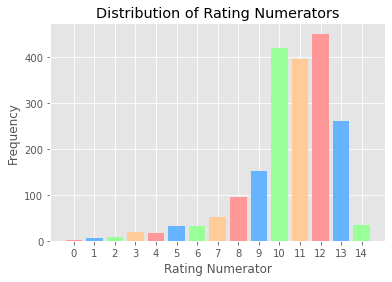

In [231]:
plt.bar(np.arange(15), subset_rating_counts, color=('#ff9999','#66b3ff','#99ff99','#ffcc99'))
plt.xticks(np.arange(15))
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Numerators');

plt.savefig('Most_common_rates.png', bbox_inches='tight')

## Distribution of Favorite Count compared to Retweet Count
- https://matplotlib.org/tutorials/introductory/pyplot.html

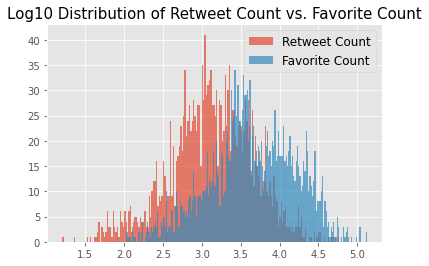

In [232]:
log_retweet = df['retweet_count'].apply(lambda x: np.log10(x))
log_favorite = df['favorite_count'].apply(lambda x: np.log10(x))
plt.hist(log_retweet, alpha=0.7, bins=200, label='Retweet Count')
plt.hist(log_favorite, alpha=0.7, bins=200, label='Favorite Count')
plt.title('Log10 Distribution of Retweet Count vs. Favorite Count', size=15)
plt.legend(loc='upper right', fontsize=12)
plt.savefig('retweet_favorite_dist');

## The most usd source

In [233]:
df['source'].value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

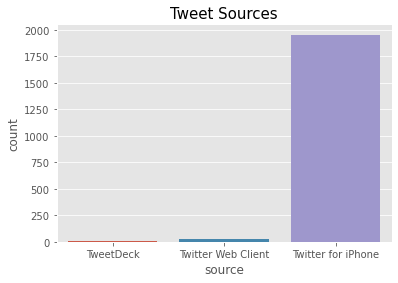

In [234]:
sns.countplot(data=df, x='source')
plt.title('Tweet Sources', size=15)
plt.savefig('most_used_twitter_source');

## The Distribution of Retweet Count

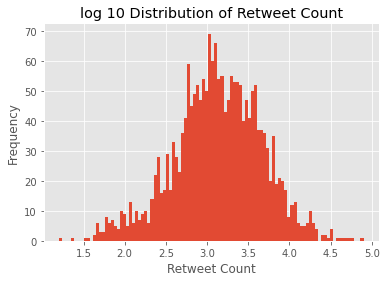

In [235]:
log_retweet = df['retweet_count'].apply(lambda x: np.log10(x))
plt.hist(log_retweet, bins=100)
plt.xlabel('Retweet Count')
plt.ylabel('Frequency')
plt.title('log 10 Distribution of Retweet Count')
plt.savefig('retweet_count_dist');